In [28]:
#!pip install pygad
import random
import numpy as np
import pygad as pg
import matplotlib.pyplot as plt



In [5]:
#########################################################
# PARAMETERS                                            #
#########################################################
pop_size = 100
chrom_length = 300
iteration_max = 1000
crossover_rate = 0.7
mutation_rate = 0.001

fitnessPopulation = np.empty([pop_size])
costVector = np.zeros([chrom_length])


In [18]:
#########################################################
# Load network                                          #
#########################################################
from google.colab import files
uploaded = files.upload()



Saving network2.txt to network2 (1).txt


In [24]:
#########################################################
# Load network                                          #
#########################################################

def loadNetwork():
     fname = "network2.txt"
     input = np.loadtxt(fname)
     for i in range(0, chrom_length):
         costVector[i] = input[i][2]



In [25]:
#########################################################
# FITNESS EVALUATION                                    #
#########################################################
def evaluateFitness(chromosomePopulation, bestFitness):
    costFullyConnectedNetwork = 30098.059999999983
    fitness_total = 0.0
    fitness_average = 0.0

    for i in range(0, pop_size):
        fitnessPopulation[i] = 0

    for i in range(0, pop_size):
        cost = 0
        for j in range(0, chrom_length):
            if chromosomePopulation[i, j] == 1:
                cost = cost + costVector[j]
        fitnessPopulation[i] = 1 - (cost / costFullyConnectedNetwork)
        # print(fitnessPopulation[i])
        fitness_total = fitness_total + fitnessPopulation[i]
        # print(fitness_total)
    fitness_average = fitness_total / pop_size

    for i in range(0, pop_size):
        if fitnessPopulation[i] >= bestFitness:
            bestFitness = fitnessPopulation[i]

    return bestFitness, fitness_average



In [26]:
#########################################################
# PERFORMANCE GRAPH                                     #
#########################################################
def plotChart(best, avg):
    plt.plot(best, label='best')
    plt.plot(avg, label='average')
    plt.ylabel('Fitness')
    plt.xlabel('Iterations')
    plt.legend()
    plt.xlim(1, iteration_max - 1)
    plt.ylim(0.0, 1.0)
    plt.show()


GENETIC ALGORITHM APPLIED TO OVERLAY NETWORK OPTIMIZATION
best fitness:  1.0
average fitness:  0.49977058322031426
Hello world


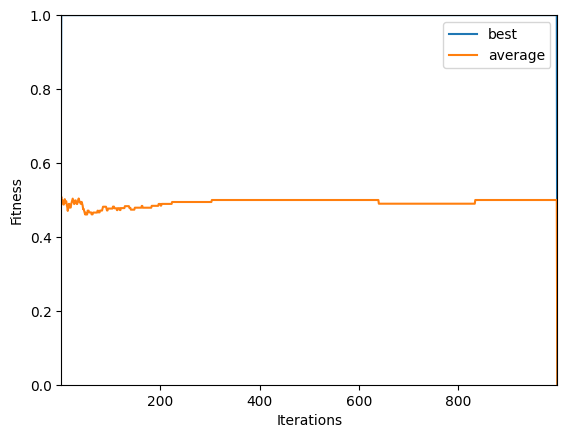

In [27]:
#########################################################
# MAIN                                                  #
#########################################################
if __name__ == '__main__':
    best = 0.0
    average = 0.0
    iteration = 0
    testResult = ()
    # load network here
    loadNetwork()
    chromosomePopulation = np.empty([pop_size, chrom_length])
    bestPlot = np.empty([iteration_max], dtype=np.float32)
    averagePlot = np.empty([iteration_max], dtype=np.float32)
    print("GENETIC ALGORITHM APPLIED TO OVERLAY NETWORK OPTIMIZATION")
    # ... to be implemented

    # Random population of chromosomes
    for i in range(0, pop_size):
        for j in range(0, chrom_length):
            chromosomePopulation[i][j] = random.randint(0, 1)


    # Tournament selection
    def selection(chromosomePopulation, fitnessPopulation):
        # first random selection
        selection_i = random.randint(0, len(chromosomePopulation) - 1)
        # second random selection
        selection_ii = random.randint(0, len(chromosomePopulation) - 1)
        if fitnessPopulation[selection_i] < fitnessPopulation[selection_ii]:
            selection_i = selection_ii

        return chromosomePopulation[selection_i], selection_i


    # Crossover two parents to create two children
    def crossover(parent1, parent2):
        # copies of parents
        c1, c2 = parent1.copy(), parent2.copy()
        # check for recombination
        if np.random.rand() < crossover_rate:
            # select crossover point that is not on the end of the string
            pt1 = np.random.randint(1, len(parent1) - 2)
            pt2 = np.random.randint(1, len(parent2) - 2)
            # perform crossover
            chunck_1 = (parent1[pt1 - 1:pt1])
            chunck_2 = (parent2[pt2 - 1:pt2])
            c1 = np.concatenate((parent1[:pt1 - 2], chunck_2, parent1[pt1 + 1:]))
            c2 = np.concatenate((parent2[:pt2 - 2], chunck_1, parent2[pt2 + 1:]))

        return [c1, c2]


    # Mutation operator
    def mutation(chrom_children):
        # print("Mutation is about to happen")
        # print(chrom_children)
        for i in range(0, len(chrom_children)):
            # check for a mutation
            if np.random.rand() < mutation_rate:
                # flip the bit
                flipLocation = np.random.randint(0, chrom_length)
                chrom_children[i][flipLocation] = 1 - chrom_children[i][flipLocation]

        return chrom_children


    bestPlot[iteration] = best
    averagePlot[iteration] = average

    while iteration < iteration_max - 1:
        # ... to be implemented

        # Fitness Results
        fitnessResult = evaluateFitness(chromosomePopulation, best)
        # parent 1
        p_1 = selection(chromosomePopulation, fitnessPopulation)
        location = p_1[1]
        # parent 2
        p_2 = selection(chromosomePopulation, fitnessPopulation)
        location2 = p_2[1]
        # Crossover & mutation operators applied
        finalChildren = mutation(crossover(p_1[0], p_2[0]))
        p_1 = finalChildren[0]
        p_2 = finalChildren[1]
        chromosomePopulation[location] = p_1[0]
        chromosomePopulation[location2] = p_2[0]

        best = fitnessResult[0]
        average = fitnessResult[1]

        bestPlot[iteration] = best
        averagePlot[iteration] = average
        iteration = iteration + 1

    print("best fitness: ", best)
    print("average fitness: ", average)
    print("Hello world")

    plotChart(bestPlot, averagePlot)
